In [1]:
# Importing Pandas
import pandas as pd
from pandas import Series, DataFrame

#Importing Numpy, Matplotlib, Seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
# Read the Titanic Test and Train files

titanic_train_df = pd.read_csv("train.csv")
titanic_test_df = pd.read_csv("test.csv")

#Preview the data
titanic_train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print("----------Training Set Data--------------")
titanic_train_df.info()

print("----------Testing Set Data---------------")
titanic_test_df.info()

----------Training Set Data--------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------Testing Set Data---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418

In [4]:
# Drop columns that might not be of use
# DataFrame.drop(labels, axis=0, level=None, inplace=False, errors='raise')[source]
train_mod_df = titanic_train_df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)
test_mod_df = titanic_test_df.drop(['Name', 'Ticket'], axis = 1)

C:\Users\Sudhanshu\Anaconda3\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


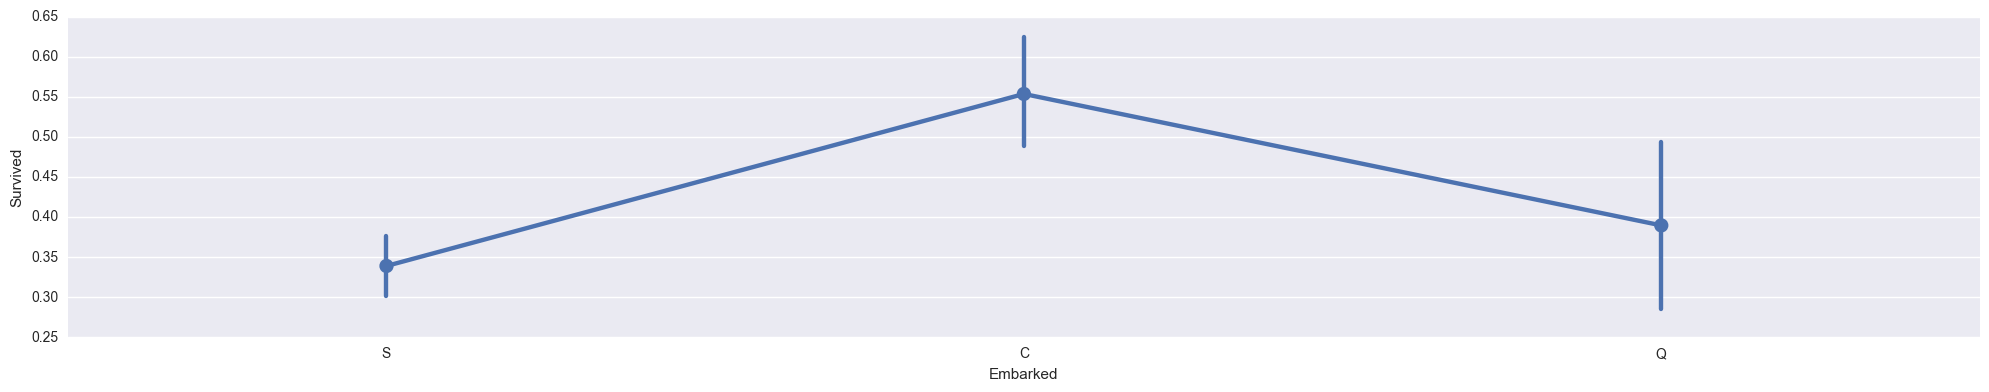

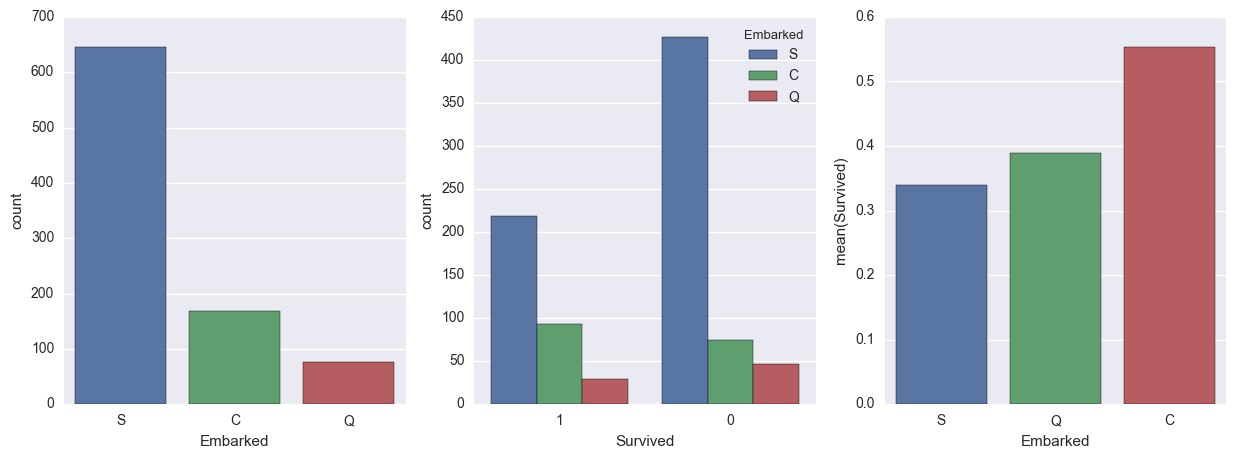

In [5]:
# Embarked Data --> Boarding Town

# print(train_mod_df.Embarked.value_counts())  
# S    644
# C    168
# Q     77

#In Train df, fill 2 missing values with the most occured value --> 'S'

train_mod_df['Embarked'] = train_mod_df["Embarked"].fillna('S')

#Factor Plot
# http://seaborn.pydata.org/generated/seaborn.factorplot.html

sns.factorplot(x="Embarked", y="Survived", data=train_mod_df, size=4, aspect=5)

# Three Subplot figures
fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize= (15,5))


sns.countplot(x="Embarked", data=train_mod_df, ax = axis1)
sns.countplot(x="Survived", hue="Embarked", data=train_mod_df, order=[1,0], ax=axis2)

# Groupby Embarked and calculate mean for survival
embarked_percent = train_mod_df[['Embarked', 'Survived']].groupby(["Embarked"], as_index = False).mean()
sns.barplot(x='Embarked', y='Survived', data=embarked_percent, order=['S','Q','C'], ax=axis3)

# Using Categorical Encoding for Regression Training Purposes
# Train Set
train_mod_df['Embarked'].loc[train_mod_df['Embarked'] == 'S'] = 1
train_mod_df['Embarked'].loc[train_mod_df['Embarked'] == 'Q'] = 2
train_mod_df['Embarked'].loc[train_mod_df['Embarked'] == 'C'] = 3
train_mod_df['Embarked'] = train_mod_df['Embarked'].astype(int)
# Test Set
test_mod_df['Embarked'].loc[test_mod_df['Embarked'] == 'S'] = 1
test_mod_df['Embarked'].loc[test_mod_df['Embarked'] == 'Q'] = 2
test_mod_df['Embarked'].loc[test_mod_df['Embarked'] == 'C'] = 3
test_mod_df['Embarked'] = test_mod_df['Embarked'].astype(int)


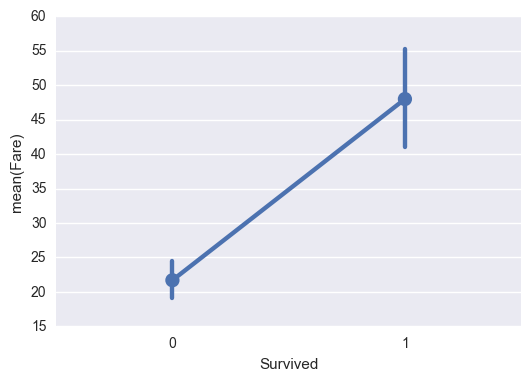

In [6]:
# Fare Analysis
#Test file has 1 missing value

test_mod_df['Fare'].fillna(value=test_mod_df.Fare.median(), inplace = True)

# Convert the Values to integer
train_mod_df['Fare'] = train_mod_df['Fare'].astype(int)
test_mod_df['Fare'] = test_mod_df['Fare'].astype(int)

sns.pointplot(x="Survived", y="Fare", data= train_mod_df)

C:\Users\Sudhanshu\Anaconda3\lib\site-packages\ipykernel\__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Sudhanshu\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


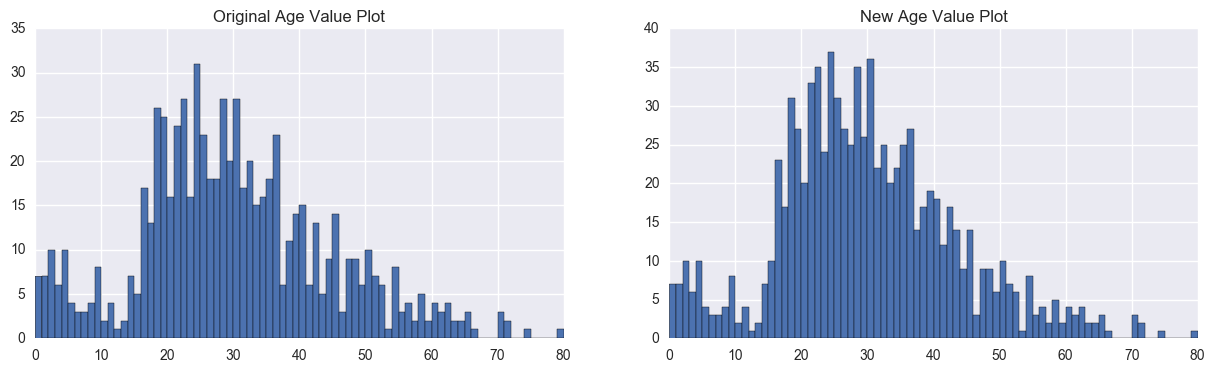

In [7]:
# Age Analysis

fig, (axis1, axis2) = plt.subplots(1, 2, figsize = [15,4])
axis1.set_title("Original Age Value Plot")
axis2.set_title("New Age Value Plot")

# Train data
#train_mod_df['Age'].isnull().value_counts()

mean_age_train = train_mod_df.Age.mean()
std_age_train = train_mod_df.Age.std()
nan_age_train = train_mod_df.Age.isnull().sum()

# Test Data
mean_age_test = test_mod_df.Age.mean()
std_age_test = test_mod_df.Age.std()
nan_age_test = test_mod_df.Age.isnull().sum()

#Generate Random Ages to plot
random1 = np.random.randint(mean_age_train - std_age_train, mean_age_train + std_age_train, size = nan_age_train)
random2 = np.random.randint(mean_age_test - std_age_test, mean_age_test + std_age_test, size = nan_age_test)

# Plot Original Values - Droping the NaN values 
train_mod_df.Age.dropna().astype(int).hist(bins=80, ax=axis1)

# Modifying Data - Replacing the NaN Values
train_mod_df["Age"][np.isnan(train_mod_df["Age"])] = random1
test_mod_df["Age"][np.isnan(test_mod_df["Age"])] = random2

train_mod_df["Age"] = train_mod_df["Age"].astype(int)
test_mod_df["Age"] = test_mod_df["Age"].astype(int)

#Plot New Data
train_mod_df.Age.hist(bins=80, ax=axis2)


C:\Users\Sudhanshu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


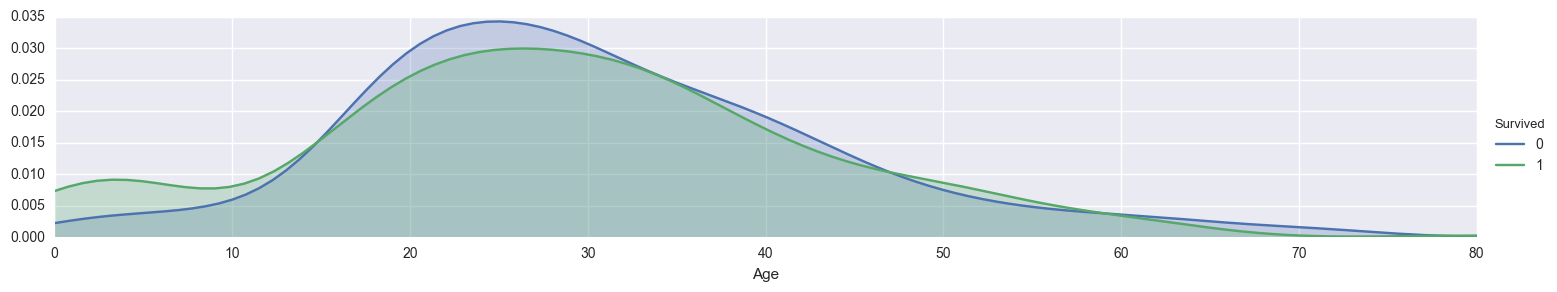

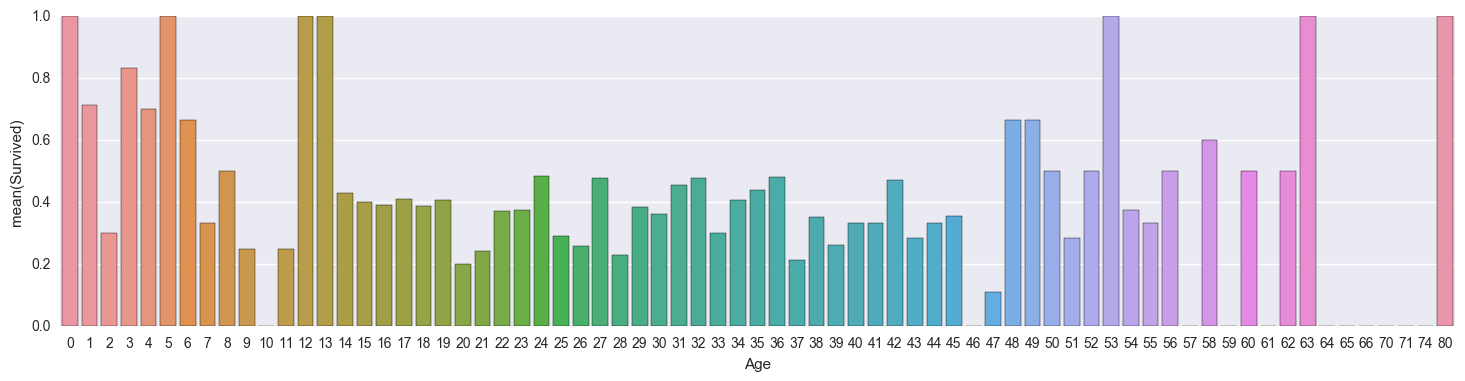

In [8]:
# Survived or Not Survived by Age
facet = sns.FacetGrid(train_mod_df, hue="Survived", aspect=5)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0, train_mod_df['Age'].max()))
facet.add_legend()

# Mean of survived passangers vs Age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = train_mod_df[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

In [9]:
# Cabin

def cabin_values(data):
    data = str(data)
    cabin = "unknown"
    if 'C' in data: cabin =  'C'   
    elif 'B' in data:  cabin =  'B'
    elif 'A' in data:  cabin =  'A'
    elif 'D' in data:  cabin =  'D'
    elif 'E' in data:  cabin =  'E'
    elif 'F' in data:  cabin =  'F'
    elif 'G' in data:  cabin =  'G'
    elif data == "NaN": cabin = "unknown"    
    #print(cabin)        
    return cabin.strip()

In [10]:
train_mod_df["Cabin"] = train_mod_df["Cabin"].apply(cabin_values)
test_mod_df["Cabin"] = test_mod_df["Cabin"].apply(cabin_values)

C:\Users\Sudhanshu\Anaconda3\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


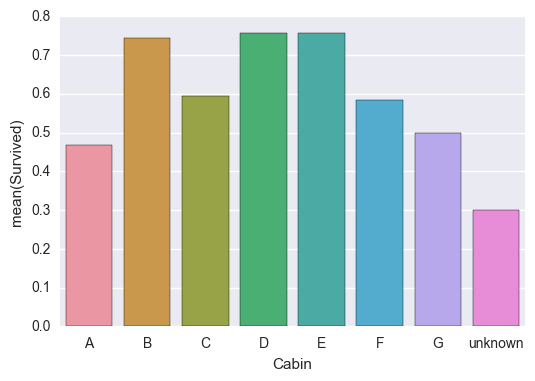

In [11]:
cabin_percent = train_mod_df[['Cabin', 'Survived']].groupby(["Cabin"], as_index = False).mean()
sns.barplot(x='Cabin', y='Survived' ,data=cabin_percent, order=['A','B','C', 'D','E','F','G','unknown'])

# Survival rates are significant for passangers in cabin B, D, E 

train_mod_df['Cabin'].loc[train_mod_df['Cabin'] == 'A'] = 1
train_mod_df['Cabin'].loc[train_mod_df['Cabin'] == 'B'] = 2
train_mod_df['Cabin'].loc[train_mod_df['Cabin'] == 'C'] = 3
train_mod_df['Cabin'].loc[train_mod_df['Cabin'] == 'D'] = 4
train_mod_df['Cabin'].loc[train_mod_df['Cabin'] == 'E'] = 5
train_mod_df['Cabin'].loc[train_mod_df['Cabin'] == 'F'] = 6
train_mod_df['Cabin'].loc[train_mod_df['Cabin'] == 'G'] = 7
train_mod_df['Cabin'].loc[train_mod_df['Cabin'] == 'unknown'] = 8

train_mod_df['Cabin'] = train_mod_df['Cabin'].astype(int)


test_mod_df['Cabin'].loc[test_mod_df['Cabin'] == 'A'] = 1
test_mod_df['Cabin'].loc[test_mod_df['Cabin'] == 'B'] = 2
test_mod_df['Cabin'].loc[test_mod_df['Cabin'] == 'C'] = 3
test_mod_df['Cabin'].loc[test_mod_df['Cabin'] == 'D'] = 4
test_mod_df['Cabin'].loc[test_mod_df['Cabin'] == 'E'] = 5
test_mod_df['Cabin'].loc[test_mod_df['Cabin'] == 'F'] = 6
test_mod_df['Cabin'].loc[test_mod_df['Cabin'] == 'G'] = 7
test_mod_df['Cabin'].loc[test_mod_df['Cabin'] == 'unknown'] = 8

test_mod_df['Cabin'] = test_mod_df['Cabin'].astype(int)


C:\Users\Sudhanshu\Anaconda3\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


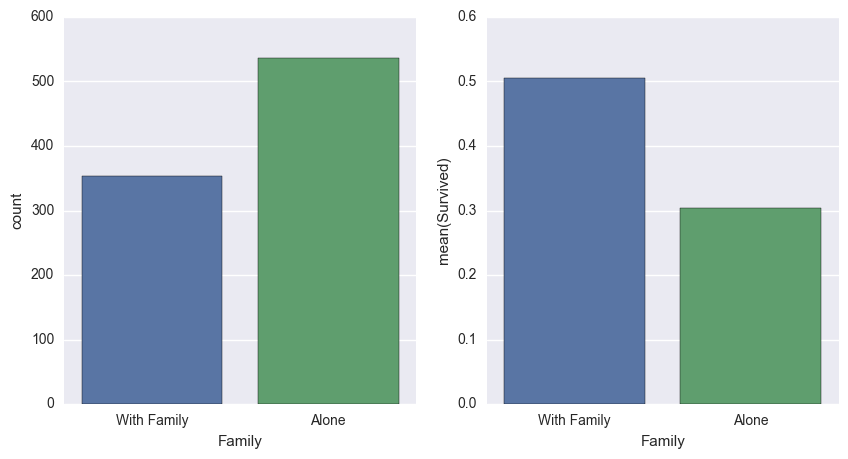

In [12]:
# Family Analysis
    
# Instead of having two columns Parch & SibSp, 
# we can have only one column represent if the passenger had any family member aboard or not,
# Meaning, if having any family member(whether parent, brother, ...etc) will increase chances of Survival or not.
train_mod_df['Family'] =  train_mod_df["Parch"] + train_mod_df["SibSp"]
train_mod_df['Family'].loc[train_mod_df['Family'] > 0] = 1
train_mod_df['Family'].loc[train_mod_df['Family'] == 0] = 0

test_mod_df['Family'] =  test_mod_df["Parch"] + test_mod_df["SibSp"]
test_mod_df['Family'].loc[test_mod_df['Family'] > 0] = 1
test_mod_df['Family'].loc[test_mod_df['Family'] == 0] = 0

# drop Parch & SibSp
train_mod_df = train_mod_df.drop(['SibSp','Parch'], axis=1)
test_mod_df    = test_mod_df.drop(['SibSp','Parch'], axis=1)

fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))

sns.countplot(x='Family', data=train_mod_df, order=[1,0], ax=axis1)

# average of survived for those who had/didn't have any family member
family_perc = train_mod_df[["Family", "Survived"]].groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=family_perc, order=[1,0], ax=axis2)

axis1.set_xticklabels(["With Family","Alone"], rotation=0)

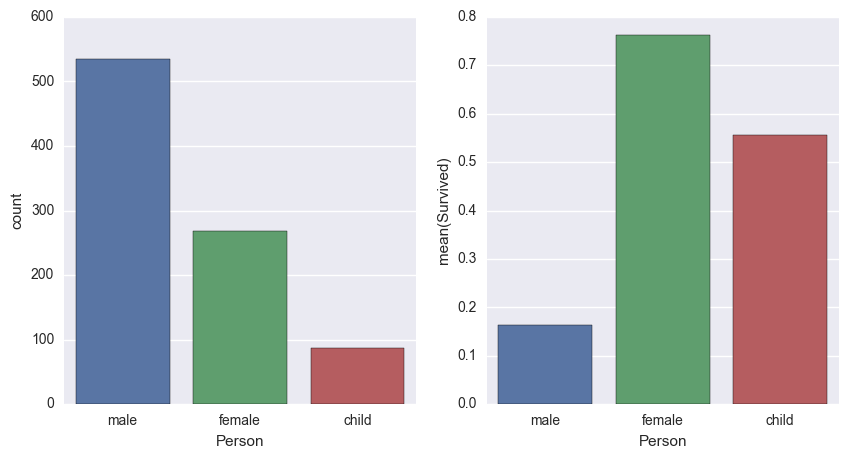

In [13]:
# Sex

# As we see, children(age < ~16) on aboard seem to have a high chances for Survival.
# So, we can classify passengers as males, females, and child
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex
    
train_mod_df['Person'] = train_mod_df[['Age','Sex']].apply(get_person,axis=1)
test_mod_df['Person']    = test_mod_df[['Age','Sex']].apply(get_person,axis=1)

# No need to use Sex column since we created Person column
train_mod_df.drop(['Sex'],axis=1,inplace=True)
test_mod_df.drop(['Sex'],axis=1,inplace=True)

# One-Hot Encoding
# create dummy variables for Person column, & drop Male as it has the lowest average of survived passengers
person_dummies_titanic  = pd.get_dummies(train_mod_df['Person'])
person_dummies_titanic.columns = ['Child','Female','Male']
person_dummies_titanic.drop(['Male'], axis=1, inplace=True)

person_dummies_test  = pd.get_dummies(test_mod_df['Person'])
person_dummies_test.columns = ['Child','Female','Male']
person_dummies_test.drop(['Male'], axis=1, inplace=True)

train_mod_df = train_mod_df.join(person_dummies_titanic)
test_mod_df    = test_mod_df.join(person_dummies_test)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

sns.countplot(x='Person', data=train_mod_df, ax=axis1)

# average of survived for each Person(male, female, or child)
person_perc = train_mod_df[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=person_perc, ax=axis2, order=['male','female','child'])

train_mod_df.drop(['Person'],axis=1,inplace=True)
test_mod_df.drop(['Person'],axis=1,inplace=True)

,Survived,Age,Fare,Cabin,Embarked,Family,Child,Female,Class_1,Class_2
0,0,22,7,8,1,1,0,0,0,0
1,1,38,71,3,3,1,0,1,1,0
2,1,26,7,8,1,0,0,1,0,0
3,1,35,53,3,1,1,0,1,1,0
4,0,35,8,8,1,0,0,0,0,0


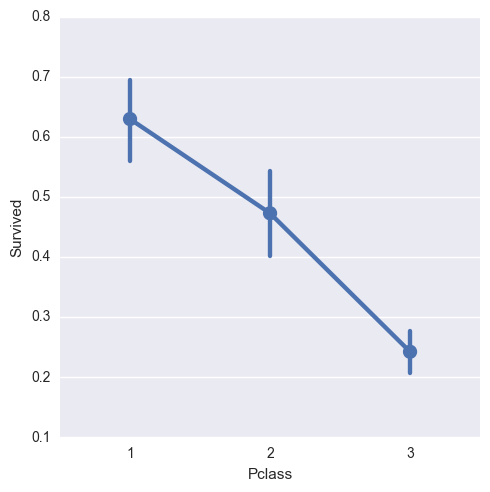

In [14]:
# P-class Analysis

sns.factorplot('Pclass','Survived',order=[1,2,3], data=train_mod_df,size=5)

#One-Hot Encoding
# create dummy variables for Pclass column, & drop 3rd class as it has the lowest average of survived passengers
pclass_dummies_titanic  = pd.get_dummies(train_mod_df['Pclass'])
pclass_dummies_titanic.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_titanic.drop(['Class_3'], axis=1, inplace=True)

pclass_dummies_test  = pd.get_dummies(test_mod_df['Pclass'])
pclass_dummies_test.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_test.drop(['Class_3'], axis=1, inplace=True)

train_mod_df.drop(['Pclass'],axis=1,inplace=True)
test_mod_df.drop(['Pclass'],axis=1,inplace=True)

train_mod_df = train_mod_df.join(pclass_dummies_titanic)
test_mod_df    = test_mod_df.join(pclass_dummies_test)

train_mod_df.head()

In [15]:
# Test Train Sets

# test_mod_df["Cabin"] = test_mod_df["Cabin"].astype(int)
# test_mod_df["Embarked"] = test_mod_df["Embarked"].astype(int)
 
X_train = train_mod_df.drop("Survived",axis=1)
y_train = train_mod_df["Survived"]
X_test = test_mod_df.drop("PassengerId", axis=1)


X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Age         891 non-null int32
Fare        891 non-null int32
Cabin       891 non-null int32
Embarked    891 non-null int32
Family      891 non-null int64
Child       891 non-null uint8
Female      891 non-null uint8
Class_1     891 non-null uint8
Class_2     891 non-null uint8
dtypes: int32(4), int64(1), uint8(4)
memory usage: 24.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Age         418 non-null int32
Fare        418 non-null int32
Cabin       418 non-null int32
Embarked    418 non-null int32
Family      418 non-null int64
Child       418 non-null uint8
Female      418 non-null uint8
Class_1     418 non-null uint8
Class_2     418 non-null uint8
dtypes: int32(4), int64(1), uint8(4)
memory usage: 11.5 KB


In [16]:
# Logistic Regression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

logreg.score(X_train, y_train)

0.81930415263748602

In [17]:
random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, y_train)


0.97194163860830529

In [18]:
final_list = list(zip(test_mod_df.PassengerId, Y_pred))

for val in final_list:
    print(val[0])


892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999
1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1110
1111
1112
111

In [19]:
dfa = pd.DataFrame(final_list)
dfa.head()
# dfa.rename(index=str, columns={"0": "A", '1': "B"})
# dfa.columns['A', 'B']
#dfa.head()
dfa2 = pd.DataFrame()
dfa2['PassengerId'] = dfa[0]
dfa2['Survived'] = dfa[1]
dfa2.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [20]:
import csv

# with open('new_file.csv', 'wb') as myfile:
#     wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
#     wr.writerow(final_list)


#dfa = pd.DataFrame(final_list)
dfa2.to_csv('Titanic_final.csv', index=False, header=True)

In [21]:
coeff_df = DataFrame(train_mod_df.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])

# preview
coeff_df

,Features,Coefficient Estimate
0,Age,-0.030023
1,Fare,0.000023
2,Cabin,-0.174408
3,Embarked,0.319089
4,Family,-0.210874
5,Child,1.534524
6,Female,2.789704
7,Class_1,1.434778
8,Class_2,1.131470
